In [1]:
import csv
import datetime as DT
import numpy as np
import pandas as pd

In [2]:
fmt = '%Y.%m.%d'
with open('sched_teams.csv', 'r') as f:
    reader = csv.reader(f)
    date_game_records = list(reader)

In [3]:
list_of_all_teams = []
for record in date_game_records:
  for element in record:
    if element != '' and element not in list_of_all_teams and element[-1].isalpha():
      list_of_all_teams.append(element)

In [4]:
#list_of_all_teams

In [5]:
datelist = pd.date_range("2017-10-15", periods=174).tolist()

In [6]:
dates = list((dobj.date().strftime('%Y-%m-%d') for dobj in datelist))

In [7]:
df = pd.DataFrame(index=list_of_all_teams, columns=dates)

In [8]:
def date_conv(day):
  # Oct = 10
  if day[1:2] == 'O':
    if day[-2:-1] == ' ':
      ds = "2017-10-0{}".format(day[-1:])
    else:
      ds = "2017-10-{}".format(day[-2:])
  # Nov = 11
  if day[1:2] == 'N':
    if day[-2:-1] == ' ':
      ds = "2017-11-0{}".format(day[-1:])
    else:
      ds = "2017-11-{}".format(day[-2:])
  # Dec = 12
  if day[1:2] == 'D':
    if day[-2:-1] == ' ':
      ds = "2017-12-0{}".format(day[-1:])
    else:
      ds = "2017-12-{}".format(day[-2:])
  # Jan = 01
  if day[1:2] == 'J':
    if day[-2:-1] == ' ':
      ds = "2018-01-0{}".format(day[-1:])
    else:
      ds = "2018-01-{}".format(day[-2:])
  # Feb = 02
  if day[1:2] == 'F':
    if day[-2:-1] == ' ':
      ds = "2018-02-0{}".format(day[-1:])
    else:
      ds = "2018-02-{}".format(day[-2:])
  # Mar = 03
  if day[1:2] == 'M':
    if day[-2:-1] == ' ':
      ds = "2018-03-0{}".format(day[-1:])
    else:
      ds = "2018-03-{}".format(day[-2:])
  # Apr = 04
  if day[1:2] == 'A':
    if day[-2:-1] == ' ':
      ds = "2018-04-0{}".format(day[-1:])
    else:
      ds = "2018-04-{}".format(day[-2:])
  return ds
  

In [9]:
for record in date_game_records:
    for element in record:
        if element in list_of_all_teams:
            df.loc[element, date_conv(record[0])] = 1

In [10]:
df.head()

,2017-10-15,2017-10-16,2017-10-17,2017-10-18,2017-10-19,2017-10-20,2017-10-21,2017-10-22,2017-10-23,2017-10-24,...,2018-03-29,2018-03-30,2018-03-31,2018-04-01,2018-04-02,2018-04-03,2018-04-04,2018-04-05,2018-04-06,2018-04-07
Boston,1,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,...,1,NaN,1,1,NaN,1,NaN,1,NaN,1.0
Vegas,1,NaN,1,NaN,NaN,NaN,1,NaN,NaN,1,...,NaN,1,1,NaN,NaN,1,NaN,1,NaN,1.0
Buffalo,1,NaN,1,NaN,NaN,1,1,NaN,NaN,1,...,1,NaN,1,NaN,1,NaN,1,NaN,1,1.0
Anaheim,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,...,NaN,1,NaN,1,NaN,NaN,1,NaN,1,1.0
NY Islanders,1,NaN,NaN,NaN,1,NaN,1,NaN,NaN,1,...,NaN,1,1,NaN,NaN,1,NaN,1,NaN,1.0


In [11]:
import seaborn as sns
import matplotlib
%matplotlib inline

In [12]:
octdatelist = pd.date_range(start="2017-10-16", end="2017-10-31").tolist()
novdatelist = pd.date_range("2017-11-01", periods=30).tolist()
decdatelist = pd.date_range("2017-12-01", periods=31).tolist()
jandatelist = pd.date_range("2018-01-01", periods=31).tolist()
febdatelist = pd.date_range("2018-02-01", periods=28).tolist()
mardatelist = pd.date_range("2018-03-01", periods=31).tolist()
aprdatelist = pd.date_range("2018-04-01", periods=7).tolist()

In [13]:
octdates = list((dobj.date().strftime('%Y-%m-%d') for dobj in octdatelist))
novdates = list((dobj.date().strftime('%Y-%m-%d') for dobj in novdatelist))
decdates = list((dobj.date().strftime('%Y-%m-%d') for dobj in decdatelist))
jandates = list((dobj.date().strftime('%Y-%m-%d') for dobj in jandatelist))
febdates = list((dobj.date().strftime('%Y-%m-%d') for dobj in febdatelist))
mardates = list((dobj.date().strftime('%Y-%m-%d') for dobj in mardatelist))
aprdates = list((dobj.date().strftime('%Y-%m-%d') for dobj in aprdatelist))

In [14]:
df_consec=df.copy()
for team in list_of_all_teams:
    df_consec.loc[team] = df.loc[team] * (df.loc[team].groupby((df.loc[team] != df.loc[team].shift()).cumsum()).cumcount() + 1)

In [15]:
for team in list_of_all_teams:
    print(df_consec.loc[team].value_counts())

1    65
2    13
Name: Boston, dtype: int64
1    67
2    11
Name: Vegas, dtype: int64
1    62
2    15
Name: Buffalo, dtype: int64
1    66
2    11
Name: Anaheim, dtype: int64
1    63
2    14
Name: NY Islanders, dtype: int64
1    65
2    13
Name: Los Angeles, dtype: int64
1    65
2    12
Name: Tampa Bay, dtype: int64
1    66
2    11
Name: Detroit, dtype: int64
1    59
2    17
Name: Pittsburgh, dtype: int64
1    67
2     9
Name: NY Rangers, dtype: int64
1    64
2    14
Name: Florida, dtype: int64
1    63
2    14
Name: Philadelphia, dtype: int64
1    63
2    14
Name: Toronto, dtype: int64
1    63
2    13
Name: Washington, dtype: int64
1    62
2    15
Name: New Jersey, dtype: int64
1    68
2    10
Name: Vancouver, dtype: int64
1    59
2    18
Name: Ottawa, dtype: int64
1    66
2    10
Name: Colorado, dtype: int64
1    66
2    11
Name: Nashville, dtype: int64
1    62
2    15
Name: Columbus, dtype: int64
1    68
2     9
Name: Winnipeg, dtype: int64
1    64
2    13
Name: Arizona, dtype: int64
1

In [16]:
for team in list_of_all_teams:
    print(df_consec.loc[team, octdates].value_counts())

1    5
Name: Boston, dtype: int64
1    5
2    1
Name: Vegas, dtype: int64
1    4
2    2
Name: Buffalo, dtype: int64
1    4
2    1
Name: Anaheim, dtype: int64
1    6
Name: NY Islanders, dtype: int64
1    6
2    1
Name: Los Angeles, dtype: int64
1    7
2    1
Name: Tampa Bay, dtype: int64
1    8
Name: Detroit, dtype: int64
1    5
2    2
Name: Pittsburgh, dtype: int64
1    7
Name: NY Rangers, dtype: int64
1    6
2    1
Name: Florida, dtype: int64
1    7
Name: Philadelphia, dtype: int64
1    6
2    1
Name: Toronto, dtype: int64
1    4
2    2
Name: Washington, dtype: int64
1    3
2    2
Name: New Jersey, dtype: int64
1    6
2    1
Name: Vancouver, dtype: int64
1    6
2    1
Name: Ottawa, dtype: int64
1    4
2    1
Name: Colorado, dtype: int64
1    5
2    1
Name: Nashville, dtype: int64
1    6
2    1
Name: Columbus, dtype: int64
1    5
2    1
Name: Winnipeg, dtype: int64
1    7
2    1
Name: Arizona, dtype: int64
1    6
2    1
Name: Dallas, dtype: int64
1    6
2    1
Name: Carolina, dtype: in

In [17]:
df[novdates].sum(axis=1).sort_values(ascending=False)

Edmonton        16.0
Minnesota       15.0
Montr̩al        15.0
Toronto         15.0
Arizona         15.0
Vancouver       15.0
Winnipeg        14.0
Anaheim         14.0
Nashville       14.0
Los Angeles     14.0
New Jersey      14.0
Washington      14.0
Boston          13.0
Carolina        13.0
Detroit         13.0
Pittsburgh      13.0
Florida         13.0
Philadelphia    13.0
Calgary         13.0
Buffalo         13.0
Vegas           13.0
Columbus        13.0
Chicago         13.0
Dallas          13.0
NY Islanders    12.0
San Jose        12.0
Tampa Bay       12.0
NY Rangers      12.0
Colorado        12.0
St. Louis       12.0
Ottawa          11.0
dtype: float64

In [18]:
months_list = [octdates,novdates,decdates,jandates,febdates,mardates,aprdates]


In [19]:
s = []
for month in months_list:
    s.append(df_consec[month].sum(axis=1).sort_values(ascending=False))

In [20]:
mbmdf = pd.concat(s, axis=1)

In [21]:
mbmdf.sort_values(by=mbmdf.columns[0], ascending=False).head(18).index.values

array(['Pittsburgh', 'St. Louis', 'Arizona', 'Tampa Bay', 'Montr̩al',
       'Ottawa', 'San Jose', 'Los Angeles', 'Florida', 'Toronto',
       'Detroit', 'Dallas', 'Columbus', 'Vancouver', 'Chicago', 'Carolina',
       'Buffalo', 'Washington'], dtype=object)

In [22]:
mbmdf.index[1]

'Arizona'

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

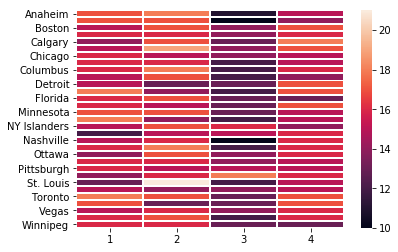

In [24]:
x = sns.heatmap(mbmdf[[1,2,3,4]],lw=1)

In [36]:
df.loc[mbmdf.sort_values(by=mbmdf.columns[1], ascending=False).index.values, octdates[-9:]].sum(axis=1).sort_values(ascending=False)

Los Angeles     5.0
Arizona         5.0
Winnipeg        4.0
Toronto         4.0
Minnesota       4.0
Anaheim         4.0
Columbus        4.0
Pittsburgh      4.0
Philadelphia    4.0
St. Louis       4.0
Florida         4.0
NY Rangers      4.0
Montr̩al        4.0
Carolina        4.0
Tampa Bay       4.0
Detroit         4.0
San Jose        4.0
Vegas           4.0
Calgary         4.0
NY Islanders    4.0
Dallas          4.0
Ottawa          4.0
Edmonton        3.0
Vancouver       3.0
Nashville       3.0
Colorado        3.0
Buffalo         3.0
Boston          3.0
Chicago         3.0
Washington      3.0
New Jersey      2.0
dtype: float64

In [30]:
df.loc[mbmdf.sort_values(by=mbmdf.columns[0], ascending=False).index.values, novdates[:10]]

,2017-11-01,2017-11-02,2017-11-03,2017-11-04,2017-11-05,2017-11-06,2017-11-07,2017-11-08,2017-11-09,2017-11-10
Pittsburgh,1,1,NaN,1,NaN,NaN,1,NaN,NaN,1
St. Louis,NaN,1,NaN,1,NaN,NaN,1,NaN,1,NaN
Arizona,NaN,1,NaN,1,NaN,1,1,NaN,1,NaN
Tampa Bay,NaN,1,NaN,1,NaN,NaN,NaN,1,1,NaN
Montr̩al,NaN,1,NaN,1,1,NaN,1,NaN,1,NaN
Ottawa,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,1
San Jose,1,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN
Los Angeles,NaN,1,NaN,1,NaN,NaN,1,NaN,1,NaN
Florida,NaN,1,NaN,1,NaN,NaN,1,NaN,NaN,1
Toronto,1,1,NaN,1,NaN,1,NaN,1,NaN,1
